In [1]:
import numpy as np
import matplotlib.pyplot as plt

今回はODEを実装する。まずは一階常微分方程式から解くことになる。今回は以下の方程式を解くことになる。
$$\frac{df}{dx} = -y+ 3$$

In [113]:
# 初期値設定
x_0 = 0 
y_0 = 1
h = 0.01

# 回数
N = 1000

# 初期値代入、履歴保存用の配列
x = x_0
y = y_0
history =np.array([[x_0,y_0]])

#右辺の方程式
def f(x,y):
    return -1*y + 3

In [114]:
for i in range(1,N+1):
   y = y + h * f(x,y)
   x = x + h
   history = np.vstack((history,np.array([x,y])))

print(history[:5])


[[0.         1.        ]
 [0.01       1.02      ]
 [0.02       1.0398    ]
 [0.03       1.059402  ]
 [0.04       1.07880798]]


次に解析解を実装する。一般解は今回、簡単に導くことができる。

In [115]:
def analytical_f(x):
    return (y_0 - 3) * np.exp(-1*x) + 3

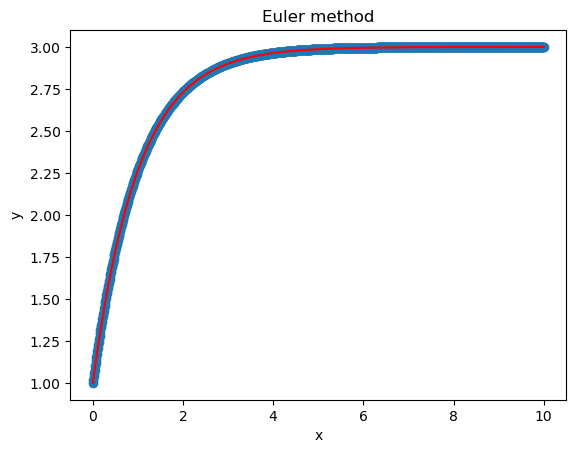

In [116]:
# プロット処理
plt.scatter(history[:,0],history[:,1] ,label="Euler method")
plt.plot(history[:,0],analytical_f(history[:,0]),"r",label="Analytical solution")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler method')
plt.show()

次に誤差を判定してみよう。

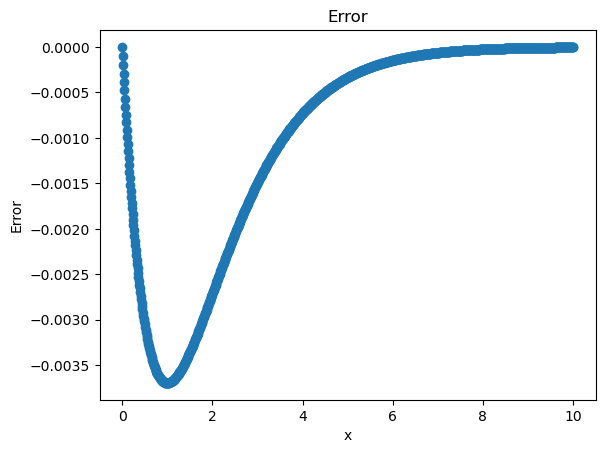

In [117]:
error = analytical_f(history[:,0]) - history[:,1]
plt.scatter(history[:,0],error,label="Error")
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error')
plt.show()

なぜ誤差が減っているのかというと、expは急激に減少したあとは緩やかに減っていくような関数系である。そのため、急激に減少したときは２次の項がめちゃくちゃに効いてEular法ではどんどんと誤差が増える分、緩やかなときは２次の項が全然効いていないため、緩やかな減少よりもEular法で近づく速度の方が早くなっているために起こるものである。ちなみにこれは、hを大きく非常に誤差が生まれる。　　　
そして、hを大きくしすぎると、振動解が生まれる。(h=3,N=10で試してみるといい)これは、Eular法が正解の値に近づこうとするが、その時の近づき方が速すぎるために振動してしまうのである。